# **Confounding Factor:**

# Correlation between number of covered Faults and number of covered Test clusters in each selected subset

## **Dataset&model**

In [ ]:
!pip install umap-learn
!pip install tslearn
!pip install hdbscan

In [ ]:
############################################################ Dataset $ model  #################################################################
from sklearn.metrics import classification_report, f1_score
import numpy as np
import time
import argparse
from keras.utils import np_utils
from tqdm import tqdm
from keras.datasets import mnist, cifar10
from keras.models import load_model, Model
from numpy import testing
from keras.preprocessing.image import img_to_array, array_to_img
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot
from keras.datasets import fashion_mnist

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet1":
      model=load_model("/content/drive/MyDrive/sadl11/model/model_mnist_LeNet1.h5")
    if model_name=="LeNet5":
      model=load_model("/content/drive/MyDrive/sadl11/model/model_mnist_LeNet5.h5")
    
    ##VGG feature extaction (4068)
    ##rank of features (2476)

    #You can use the stored verion or call vgg function to extract features(comment out the second line)
    MNIST_VGG=np.load("/content/drive/MyDrive/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    #MNIST_VGG=vgg("mnist")
    features_vgg=MNIST_VGG

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model = load_model('/content/drive/MyDrive/sadl11/model/model_cifar.h5')
    #VGG feature extaction (4068)
    #rank of features (3845)

    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    Cifar_VGG=np.load("/content/drive/MyDrive/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    #Cifar_VGG=vgg("cifar10")
    features_vgg=Cifar_VGG
    
  y_test = np_utils.to_categorical(y_test, 10)
  y_test=np.argmax(y_test, axis=1)  
  y_train = np_utils.to_categorical(y_train, 10)
  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model


In [ ]:
############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset mnist or cifar10: ")

############################# MNIST ###################################################################################
if data_name=="mnist":
  model_name=input("Enter the model name LeNet1 or LeNet5: ")
  x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
  print(data_name, model_name)

############################# CIFAR10 ##################################################################################
if data_name=="cifar10": 
  model_name=input("Enter the model name 12Conv: ")
  x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
  print(data_name,model_name)

model.summary()
print("x_test.shape", x_test.shape)

## **Clustering**

### 1- Test data clustering (from scratch)









In [ ]:

import time
import copy
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import hdbscan
import copy
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# import umap
import umap.umap_ as umap


plot_kwds = {'alpha' : 0.15, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print("labels", labels)
    print("max", labels.max())
    global ll
    ll=copy.deepcopy(labels)
    # ll.sort()
    print(ll)
    kk=list(copy.deepcopy(ll))
    goo=copy.deepcopy(ll)
    goo.sort()
    # for i in range(-1,goo.max()):
    i=-1
    while (i<= goo.max()):
      k=kk.count(i)
      print("number of inputs in class",i,"is", k)
      i=i+1
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
def scale_one(X):
  nom = (X-X.min())*(1)
  denom = X.max() - X.min()
  koko= nom/denom 
  return koko

In [ ]:
Y_pred= model(x_test)
Y_pred=np.argmax(Y_pred , axis=1)
print(Y_pred)
YP_Scaled=scale_one(Y_pred)
YT_Scaled=scale_one(y_test)
# Cl_label, trace, umap_output =HDBSCAN_clustering(features, YT_Scaled, YP_Scaled)

[3 8 1 ... 5 1 7]


In [ ]:
import umap
import umap.umap_ as umap
# def HDBSCAN_clustering(
X_features=features
TY_scaled=YT_Scaled
PY_scaled=YP_Scaled
kk=[]
trace=[]
ss_tt=[]
d_scale_umap=[]
bb=[]
hdbscan_in_umap=[]
silu=[]
Sumn=0
for i,j in zip([500,400,300,250],[450,350,250,200]):
  for k,o in zip([5,10,15,20,25],[3,5,10,15,20]):
    for n_n in [0.03, 0.1, 0.25, 0.5]:
      fit = umap.UMAP(min_dist=n_n, n_components=i, n_neighbors=k)
      u1 = fit.fit_transform(X_features)
      fit = umap.UMAP(min_dist=0.1, n_components=j,n_neighbors=o)
      u = fit.fit_transform(u1)
      u=np.c_[u, TY_scaled]
      u=np.c_[u, PY_scaled]
      print("u",u.shape)
      # for gg in [3,5,10,15,20,30,35,40]:
      print("len", len(list(bb)))
      plot_clusters(u, hdbscan.HDBSCAN, (), {'min_cluster_size':5})
      # print("noisy", list(ll).count(-1))
      jo=sklearn.metrics.silhouette_score(u, ll)
      #x_mis standard
      ss=sklearn.metrics.silhouette_score(X_features, ll) 
      print("###############################################################################################################################################")
      print("###############################################################################################################################################")
      print("x_stand",ss)
      if ((jo>=0.1 or ss>=0.1) and ll.max()+2>=200):
        bb.append(ll)
        my_trace = [i,j,k,o,jo,ll.max()+2,list(ll).count(-1)]
        trace.append(my_trace)
      # print("ll",ll)
        hdbscan_in_umap.append(u)
        print("OOOOOOOOOOOOOO",Sumn)
        print("SIIIIIIIIIII",jo , ss)
        Sumn=Sumn+1
        print("BBBBBBBBBBBBBBBB",list(ll).count(-1))
  # return bb, trace, hdbscan_in_umap

**evaluation** 
Config 7: 
Cifar10 >> test dataset>> 10000 features>> 4068

the same as GD features. not fault's features.

Siluhette score >>> 60.04%

Clusters + 1 noisy >>> 732

Noisy test inputs >>> 1865


### 2- Test data clustering (loading the best clustring results)

In [ ]:
Cl_label=np.load("/content/drive/MyDrive/RQ_Con_factor/clustering/Cifar10_12Conv/Test_cluster_4068.npy")
trace=np.load("/content/drive/MyDrive/RQ_Con_factor/clustering/Cifar10_12Conv/all_trace_4068.npy", allow_pickle=True)
umap_output=np.load("/content/drive/MyDrive/RQ_Con_factor/clustering/Cifar10_12Conv/umap_output_4068.npy")


## Results: Best config:
############################corr################ SpearmanrResult(correlation=-0.03363846018138187, pvalue=0.7986046349000706)
############################corr################ SpearmanrResult(correlation=0.17080272380374698, pvalue=0.19195655547716545)
############################corr################ SpearmanrResult(correlation=-0.20781561692272338, pvalue=0.11108851646974935)
############################corr################ SpearmanrResult(correlation=0.05655173019946483, pvalue=0.6677945748479186)

## Results: Same Config for clustering as fault definition:
############################corr################ SpearmanrResult(correlation=0.08237652156248673, pvalue=0.5314934376842806)
############################corr################ SpearmanrResult(correlation=0.167517892837139, pvalue=0.2007722846539697)
############################corr################ SpearmanrResult(correlation=-0.037037063790766864, pvalue=0.7787493056897938)
############################corr################ SpearmanrResult(correlation=0.08849423455303927, pvalue=0.5013451520954808)

## Correlation 

1.   #faults
2.   #test clusters

for 60 subsets with different sizes

In [ ]:
import numpy as np
import copy


def N_fault_Tclusters(n_samples, sample , model_name):
  i=0
 
  if model_name=="LeNet1":
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/mis_index_testdataset_MNIST_LeNet1.npy") 
    P = np.zeros((n_samples,28,28,1))
    index_bb=2
    # model=load_model("/content/drive/MyDrive/sadl11/model/model_mnist_LeNet1.h5")
  if model_name=="LeNet5":
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_bb=4
    Clabel=Cl_label
    P = np.zeros((n_samples,28,28,1))
  if model_name=="12Conv":
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    index_bb=0
    Clabel=Cl_label[9]
    P = np.zeros((n_samples,32,32,3))
  for L in sample:
    P[i]=x_test[L,:,:,:]
    i=i+1
  ddd=model(P)
  p_inverted = np.argmax(ddd , axis=1)
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  test_cluster=[]
  for l in sample:
    test_cluster.append(Clabel[l])
    if (p_inverted[i]==y_test[l]):
      pos=pos+1
    else:
      neg=neg+1 
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (bb[index_bb][ind]>-1):
        cluster_lab.append(bb[index_bb][ind])
      if (bb[index_bb][ind]==-1):
        cluster_lab.append(nn)
        nn=nn-1
    i=i+1 
  #Each noisy mispredicted input is an specific fault
  faults_n=len(list(set(cluster_lab)))
  #All noisy mispredicted inputs are considered as one specific fault
  TestCL_1noisy=len(list(set(test_cluster)))
  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, TestCL_1noisy

In [ ]:
Clabel=Cl_label[9]
len(Clabel)

In [ ]:
from scipy import stats
import  array
path="/content/drive/MyDrive/RQ2_3/Correlation/BB_cifar_BB_vgg_12conv/"
N_Repeat=60
Corr=[]
allF1=[]
allF2=[]
allTest_CL=[]
for Size in [100,200,300,400]:
  Fault1=[]
  Fault2=[]
  Test_CL=[]
  for i in range(N_Repeat):
    subset=np.load(path+str(Size)+"_"+ str(i)+".npy")
    subset=list(subset)
    F1, F2 , TCL= N_fault_Tclusters(Size, subset, model_name)
    Fault1.append(F1)
    Fault2.append(F2)
    Test_CL.append(TCL)
  print("############################corr################",stats.spearmanr(Fault1, Test_CL) )
  spearman=stats.spearmanr(Fault1, Test_CL)
  allF1.append(Fault1)
  allF2.append(Fault2)
  allTest_CL.append(TCL)
  Corr.append(spearman)

############################corr################ SpearmanrResult(correlation=0.08237652156248673, pvalue=0.5314934376842806)
############################corr################ SpearmanrResult(correlation=0.167517892837139, pvalue=0.2007722846539697)
############################corr################ SpearmanrResult(correlation=-0.037037063790766864, pvalue=0.7787493056897938)
############################corr################ SpearmanrResult(correlation=0.08849423455303927, pvalue=0.5013451520954808)


## MNIST LeNet5 Confounding factor

## **Clustering**

### 1- Test data clustering (from scratch)









In [ ]:

import time
import copy
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import hdbscan
import copy
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# import umap
import umap.umap_ as umap


plot_kwds = {'alpha' : 0.15, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print("labels", labels)
    print("max", labels.max())
    global ll
    ll=copy.deepcopy(labels)
    # ll.sort()
    print(ll)
    kk=list(copy.deepcopy(ll))
    goo=copy.deepcopy(ll)
    goo.sort()
    # for i in range(-1,goo.max()):
    i=-1
    while (i<= goo.max()):
      k=kk.count(i)
      print("number of inputs in class",i,"is", k)
      i=i+1
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
def scale_one(X):
  nom = (X-X.min())*(1)
  denom = X.max() - X.min()
  koko= nom/denom 
  return koko

In [ ]:
Y_pred= model(x_test)
Y_pred=np.argmax(Y_pred , axis=1)
print(Y_pred)
YP_Scaled=scale_one(Y_pred)
YT_Scaled=scale_one(y_test)
# Cl_label, trace, umap_output =HDBSCAN_clustering(features, YT_Scaled, YP_Scaled)

[7 2 1 ... 4 5 6]


In [ ]:
import umap
import umap.umap_ as umap
# def HDBSCAN_clustering(
X_features=features
TY_scaled=YT_Scaled
PY_scaled=YP_Scaled
kk=[]
trace=[]
ss_tt=[]
d_scale_umap=[]
bb=[]
hdbscan_in_umap=[]
silu=[]
Sumn=0
for i,j in zip([300],[250]):
  for k,o in zip([10],[5]):
    for n_n in [0.03, 0.01]:
      fit = umap.UMAP(min_dist=n_n, n_components=i, n_neighbors=k)
      u1 = fit.fit_transform(X_features)
      fit = umap.UMAP(min_dist=0.1, n_components=j,n_neighbors=o)
      u = fit.fit_transform(u1)
      u=np.c_[u, TY_scaled]
      u=np.c_[u, PY_scaled]
      print("u",u.shape)
      # for gg in [3,5,10,15,20,30,35,40]:
      print("len", len(list(bb)))
      plot_clusters(u, hdbscan.HDBSCAN, (), {'min_cluster_size':15})
      # print("noisy", list(ll).count(-1))
      jo=sklearn.metrics.silhouette_score(u, ll)
      #x_mis standard
      ss=sklearn.metrics.silhouette_score(X_features, ll) 
      print("###############################################################################################################################################")
      print("###############################################################################################################################################")
      print("x_stand",ss)
      if ((jo>=0.44 or ss>=0.1)):
        bb.append(ll)
        my_trace = [i,j,k,o,jo,ll.max()+2,list(ll).count(-1)]
        trace.append(my_trace)
      # print("ll",ll)
        hdbscan_in_umap.append(u)
        print("OOOOOOOOOOOOOO",Sumn)
        print("SIIIIIIIIIII",jo , ss)
        Sumn=Sumn+1
        print("BBBBBBBBBBBBBBBB",list(ll).count(-1))
  # return bb, trace, hdbscan_in_umap

### 2- Test data clustering (loading the clustring results)

In [ ]:
Cl_label=np.load("/content/drive/MyDrive/RQ_Con_factor/clustering/MNIST_LeNet5/Test_cluster_4068.npy")
trace=np.load("/content/drive/MyDrive/RQ_Con_factor/clustering/MNIST_LeNet5/all_trace_4068.npy", allow_pickle=True)
umap_output=("/content/drive/MyDrive/RQ_Con_factor/clustering/MNIST_LeNet5/umap_output_config0_4068.npy")


evaluation Config 0: mnist >> test dataset>> 10000 features>> 4068

the same as GD features. not fault's features.

Siluhette score >>> ==50%

Clusters + 1 noisy >>> 121

Noisy test inputs >>> 1151

##**Correlation**

1.   #faults
2.   #test clusters

for 60 subsets with different sizes

### Results: Same Config for clustering as fault definition MNIST LeNet5:
###########################corr################ SpearmanrResult(correlation=-0.2670127678921597, pvalue=0.0391723585086014)
############################corr################ SpearmanrResult(correlation=0.041378638966286775, pvalue=0.7535896792203143)
############################corr################ SpearmanrResult(correlation=-0.0025073541128325287, pvalue=0.9848304609942955)
############################corr################ SpearmanrResult(correlation=-0.09703472435471218, pvalue=0.4607821033348395)

In [ ]:
import numpy as np
import copy


def N_fault_Tclusters(n_samples, sample , model_name):
  i=0
 
  if model_name=="LeNet1":
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet1_BBMNIST/mis_index_testdataset_MNIST_LeNet1.npy") 
    P = np.zeros((n_samples,28,28,1))
    index_bb=2
  if model_name=="LeNet5":
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet5_BBMNIST/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_bb=4
    Clabel=Cl_label
    P = np.zeros((n_samples,28,28,1))
  if model_name=="12Conv":
    bb=np.load("/content/drive/MyDrive/RQ2_3/Clustering/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load("/content/drive/MyDrive/RQ2_3/Clustering/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    index_bb=0
    Clabel=Cl_label[9]
    P = np.zeros((n_samples,32,32,3))
  for L in sample:
    P[i]=x_test[L,:,:,:]
    i=i+1
  ddd=model(P)
  p_inverted = np.argmax(ddd , axis=1)
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  test_cluster=[]
  for l in sample:
    test_cluster.append(Clabel[l])
    if (p_inverted[i]==y_test[l]):
      pos=pos+1
    else:
      neg=neg+1 
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (bb[index_bb][ind]>-1):
        cluster_lab.append(bb[index_bb][ind])
      if (bb[index_bb][ind]==-1):
        cluster_lab.append(nn)
        nn=nn-1
    i=i+1 
  #Each noisy mispredicted input is an specific fault
  faults_n=len(list(set(cluster_lab)))
  #All noisy mispredicted inputs are considered as one specific fault
  TestCL_1noisy=len(list(set(test_cluster)))
  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, TestCL_1noisy

In [ ]:
from scipy import stats
import  array
Clabel=Cl_label
path="/content/drive/MyDrive/RQ2_3/Correlation/BB_mnist_BB_LeNet5/Size"
N_Repeat=60
Corr=[]
allF1=[]
allF2=[]
allTest_CL=[]
for Size in [100,200,300,400]:
  Fault1=[]
  Fault2=[]
  Test_CL=[]
  for i in range(N_Repeat):
    subset=np.load(path+str(Size)+"_"+ str(i)+".npy")
    subset=list(subset)
    F1, F2 , TCL= N_fault_Tclusters(Size, subset, model_name)
    Fault1.append(F1)
    Fault2.append(F2)
    Test_CL.append(TCL)
  print("############################corr################",stats.spearmanr(Fault1, Test_CL) )
  spearman=stats.spearmanr(Fault1, Test_CL)
  allF1.append(Fault1)
  allF2.append(Fault2)
  allTest_CL.append(TCL)
  Corr.append(spearman)

############################corr################ SpearmanrResult(correlation=-0.2670127678921597, pvalue=0.0391723585086014)
############################corr################ SpearmanrResult(correlation=0.041378638966286775, pvalue=0.7535896792203143)
############################corr################ SpearmanrResult(correlation=-0.0025073541128325287, pvalue=0.9848304609942955)
############################corr################ SpearmanrResult(correlation=-0.09703472435471218, pvalue=0.4607821033348395)


# **Retraining-fault validation**

## **Before main Experiment**

In [ ]:
y_pred= model(x_test)
y_pred=np.argmax(y_pred , axis=1)
f1_score(y_test,y_pred, average="weighted")
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5','class 6', 'class 7', 'class 8','class 9']
print(classification_report(y_test, y_pred, target_names=target_names))
y_test1 = np_utils.to_categorical(y_test, 10)


              precision    recall  f1-score   support

     class 0       0.83      0.90      0.86      1000
     class 1       0.93      0.94      0.93      1000
     class 2       0.79      0.81      0.80      1000
     class 3       0.84      0.64      0.73      1000
     class 4       0.82      0.89      0.86      1000
     class 5       0.82      0.80      0.81      1000
     class 6       0.84      0.93      0.88      1000
     class 7       0.89      0.90      0.90      1000
     class 8       0.95      0.90      0.92      1000
     class 9       0.91      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
dictfault={}
lenn=[]
for i in range(Clustering_labels.max()+1):
  x=np.where(Clustering_labels[:len(mis_ind_test)] == i)[0]
  lenn.append(len(x))
  dictfault.update({'fault'+str(i): x})
for i in dictfault.keys():
  for j in range(len(dictfault[str(i)])):
    dictfault[str(i)][j]=mis_ind_test[dictfault[str(i)][j]]



dictf={}
dictwhere={}
lenn=[]
j=0
for i in range(len(dictfault)):
  x=np.where(Clustering_labels[:len(mis_ind_test)] == i)[0]
  lenn.append(len(x))
  dictwhere.update({'fault'+str(i): x})
#just consider fault clusters which has more than 25 mispredicted inputs (we need clusters with more inputs for retraining)
  if len(dictfault['fault'+ str(i)])>20:
    gg=dictfault['fault'+ str(i)]
    dictf.update({'fault'+ str(i): gg})
    j=j+1

## **Main Experiment** Retrain sample + 85% of each cluster
test on 15% remaining and test on all other clusters 

In [ ]:

from sklearn.utils import shuffle
import random
from tensorflow.keras.optimizers import SGD, Adam,Adadelta,Adagrad
from numpy.random.mtrand import sample
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model1 = model
y_test1 = np_utils.to_categorical(y_test, 10)

all=[]
for i in dictfault.values():
  for j in i:
    all.append(j)
all.sort()

noisyinput=list(np.where(Clustering_labels[:len(mis_ind_test)]==-1))[0]
noisyindex=[]
for i in noisyinput:
  noisyindex.append(mis_ind_test[i])

alltestwn=set(all)-set(noisy_index)
trainindex=random.sample(alltestwn, int(0.80*(len(alltestwn))))
testindex= alltestwn- set(trainindex)
#Train on all training inputs + all test mispredicted - noisy mispredicted test
Yretrain2=np.zeros((len(trainindex)+len(x_train),10))
Xretrain2 = np.zeros((len(trainindex)+len(x_train),32,32,3))
tr=random.sample(range(len(x_train)),len(x_train))
Xtest2= np.zeros((len(testindex),32,32,3))
Ytest2= np.zeros((len(testindex)))
Yval2= np.zeros((len(testindex),10))

j=0
for i in trainindex:
  Xretrain2[j]=x_test[i, :,:,:]
  Yretrain2[j]=y_test1[i,:]
  j=j+1
for n in tr:
  Xretrain2[j]=x_train[n,:,:,:]
  Yretrain2[j]=y_train[n,:]
  j=j+1
Yretrain2=np.array(Yretrain2)
x_re2, y_re2 = shuffle(Xretrain2, Yretrain2)


#Test indexes of all mispredicted inputs from test dataset without noisy (1707-56)
k=0
for i in testindex:
  Xtest2[k]=x_test[i,:,:,:]
  Ytest2[k]=y_test[i]
  Yval2[k]=y_test1[i]
  k=k+1
final=[]
opt = Adadelta(learning_rate=0.005)
opt1=tf.keras.optimizers.Adagrad(
    learning_rate=0.005)
# opt2=tf.keras.optimizers.Adam(
#     learning_rate=0.005)
opt3=tf.keras.optimizers.Adamax(
    learning_rate=0.005)
opt4=tf.keras.optimizers.RMSprop(
    learning_rate=0.001)
opt5=tf.keras.optimizers.SGD(
    learning_rate=0.01)
for ep in [30, 50, 70, 100]:
  for bat in [50,100,150]:
    opp=0
    for optim in [opt,opt1,opt3]:
      # compile the model
      model.compile(optimizer=optim, loss='categorical_crossentropy')
      model.fit(Xretrain2,Yretrain2, epochs=ep, batch_size=bat, validation_data=(Xtest2,Yval2), verbose=0)
  #Test on all mispredicted inputs from test dataset without noisy 
      ypre1= model(Xtest2)
      ypre1=np.argmax(ypre1 , axis=1)
      print("f1",f1_score(Ytest2,ypre1, average="weighted"))
      ac=accuracy_score(Ytest2,ypre1)
      print("ac", accuracy_score(Ytest2,ypre1))
      print("optim",opp,"bat",bat,"ep", ep)
      target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5','class 6', 'class 7', 'class 8','class 9']
      print(classification_report(Ytest2, ypre1, target_names=target_names))
#Test on all test dataset
      yp= model(x_test)
      yp=np.argmax(yp , axis=1)
      ac2=accuracy_score(y_test,yp)
      print("ac2", ac2)
      if ac>=0.40:
        final.append([ep,bat,opp,ac,ac2])
      model = model1
      opp=opp+1



In [ ]:

AC1_p1=np.load("/content/drive/MyDrive/RQ_Faultvalidation/part1(80%,20%)/Final_AC/P1_Cifar_ac_20%.npy")

AC2_p2=np.load("/content/drive/MyDrive/RQ_Faultvalidation/part1(80%,20%)/Final_AC/P2_Cifar_ac_other.npy")

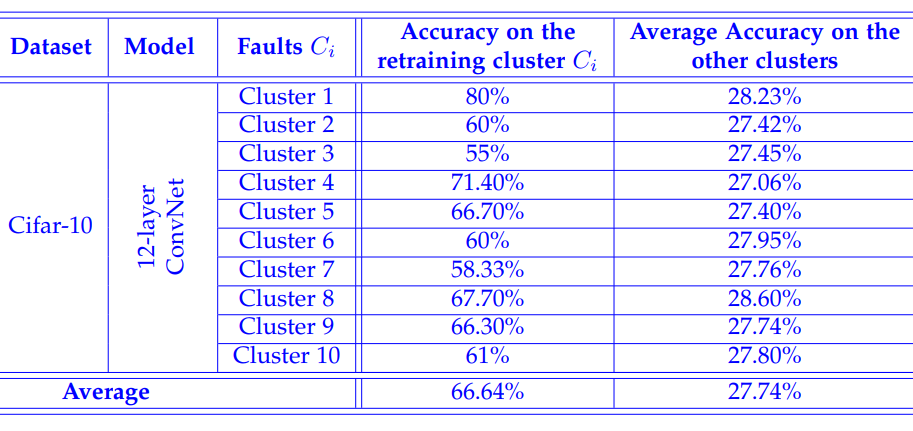